# DigiNext Bootcamp Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import TargetEncoder

## Product Dataset

In [2]:
df_products = pd.read_csv('BaSalam.products.csv')

/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_1930/1451024866.py:1: DtypeWarning: Columns (18,35,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_products = pd.read_csv('BaSalam.products.csv')


In [ ]:
df_products.head()

,_id,_score,sales_count_week,name,price,status_id,status_title,stock,photo_MEDIUM,photo_SMALL,...,vendor_owner_city,vendor_owner_id,isFreeShipping,IsAvailable,IsSaleable,mainAttribute,categoryTitle,published,video_ORIGINAL,promotions
0,9873883,468.75000,14,پسته فندقی خندان امسالی یک کیلویی تضمین کیفیت ...,5170000.0,2976.0,در دسترس,746.0,https://statics.basalam.com/public-17/users/Pe...,https://statics.basalam.com/public-17/users/Pe...,...,قاین,13052433.0,False,True,True,1000 گرم,میوه تازه,NaN,NaN,NaN
1,21808,466.66666,13,روغن زیتون فدک 1 لیتری مزرعه ارگانیک فدک سید ا...,6600000.0,2976.0,در دسترس,4.0,https://statics.basalam.com/public-3/users/J2/...,https://statics.basalam.com/public-3/users/J2/...,...,قم,20.0,False,True,True,900 گرم,روغن‌های خوراکی,True,https://basalam-com.arvanvod.ir/yOpvGE3e0D/x3Q...,NaN
2,10215970,464.28570,12,عناب درجه یک بیرجند یک کیلویی. تضمین کیفیت و ...,1360000.0,2976.0,در دسترس,813.0,https://statics.basalam.com/public-13/users/Pe...,https://statics.basalam.com/public-13/users/Pe...,...,قاین,13052433.0,False,True,True,1000 گرم,میوه تازه,NaN,NaN,NaN
3,11061637,461.53845,11,هل سبز اکبر بنفش50گرمی. سبز ودرشت وبسیار معطر,1054000.0,2976.0,در دسترس,1708.0,https://statics.basalam.com/public-14/users/ME...,https://statics.basalam.com/public-14/users/ME...,...,قاین,1145924.0,False,True,True,50 گرم,ادویه,NaN,NaN,NaN
4,10843522,461.53845,11,زرشک دانه اناری اعلا 1402(یک کیلویی).محصول تضم...,1830000.0,2976.0,در دسترس,1509.0,https://statics.basalam.com/public-16/users/LZ...,https://statics.basalam.com/public-16/users/LZ...,...,قاین,1246369.0,False,True,True,1000 گرم,میوه تازه,NaN,NaN,NaN


### DataCleaning

In [5]:
df_weight = df_products[['weight', 'mainAttribute']]
df_weight

,weight,mainAttribute
0,1000.0,1000 گرم
1,900.0,900 گرم
2,1000.0,1000 گرم
3,50.0,50 گرم
4,1000.0,1000 گرم
...,...,...
2411353,25.0,NaN
2411354,40.0,NaN
2411355,30.0,NaN
2411356,10.0,NaN


In [6]:
df_score = df_products[['_score', 'rating_average']]
df_score

,_score,rating_average
0,468.75000,4.7
1,466.66666,4.9
2,464.28570,5.0
3,461.53845,5.0
4,461.53845,4.9
...,...,...
2411353,0.00000,0.0
2411354,0.00000,0.0
2411355,0.00000,0.0
2411356,0.00000,0.0


In [7]:
df_status = df_products[['vendor_statusId', 'vendor_status_id','vendor_status_title']]
df_status

,vendor_statusId,vendor_status_id,vendor_status_title
0,2987.0,2987.0,فعال
1,2987.0,2987.0,فعال
2,2987.0,2987.0,فعال
3,2987.0,2987.0,فعال
4,2987.0,2987.0,فعال
...,...,...,...
2411353,2987.0,2987.0,فعال
2411354,2987.0,2987.0,فعال
2411355,2987.0,2987.0,فعال
2411356,2987.0,2987.0,فعال


In [8]:
df_cat = df_products[['categoryId', 'new_categoryId','categoryTitle']]
df_cat

,categoryId,new_categoryId,categoryTitle
0,0.0,191.0,میوه تازه
1,160.0,154.0,روغن‌های خوراکی
2,0.0,191.0,میوه تازه
3,0.0,133.0,ادویه
4,0.0,191.0,میوه تازه
...,...,...,...
2411353,0.0,1015.0,سایر لوازم الکتریکی همراه
2411354,0.0,1015.0,سایر لوازم الکتریکی همراه
2411355,0.0,1015.0,سایر لوازم الکتریکی همراه
2411356,0.0,1015.0,سایر لوازم الکتریکی همراه


In [9]:
df_sale = df_products[['sales_count_week', 'IsSaleable', 'IsAvailable']]
df_sale

,sales_count_week,IsSaleable,IsAvailable
0,14,True,True
1,13,True,True
2,12,True,True
3,11,True,True
4,11,True,True
...,...,...,...
2411353,0,True,True
2411354,0,True,True
2411355,0,True,True
2411356,0,True,True


In [10]:
df_products.columns

Index(['_id', '_score', 'sales_count_week', 'name', 'price', 'status_id',
       'status_title', 'stock', 'photo_MEDIUM', 'photo_SMALL',
       'rating_average', 'rating_count', 'rating_signals', 'primaryPrice',
       'preparationDays', 'weight', 'categoryId', 'has_delivery',
       'has_variation', 'new_categoryId', 'navigation_id', 'vendor_name',
       'vendor_identifier', 'vendor_statusId', 'vendor_freeShippingToIran',
       'vendor_freeShippingToSameCity', 'vendor_cityId', 'vendor_provinceId',
       'vendor_has_delivery', 'vendor_score', 'vendor_id', 'vendor_status_id',
       'vendor_status_title', 'vendor_owner_city', 'vendor_owner_id',
       'isFreeShipping', 'IsAvailable', 'IsSaleable', 'mainAttribute',
       'categoryTitle', 'published', 'video_ORIGINAL', 'promotions'],
      dtype='object')

In [11]:
df_products_light = df_products.drop(['promotions','video_ORIGINAL','published','IsSaleable','photo_SMALL', 'rating_signals','mainAttribute','categoryId', 'navigation_id','vendor_statusId', 'vendor_status_id',  'vendor_status_title'], axis=1)

In [12]:
df_products_light = df_products_light.drop(['status_title'], axis=1)

In [13]:
df_products_light = df_products_light.drop(['IsAvailable'], axis=1)

In [14]:
df_products_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411358 entries, 0 to 2411357
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   _id                            int64  
 1   _score                         float64
 2   sales_count_week               int64  
 3   name                           object 
 4   price                          float64
 5   status_id                      float64
 6   stock                          float64
 7   photo_MEDIUM                   object 
 8   rating_average                 float64
 9   rating_count                   float64
 10  primaryPrice                   float64
 11  preparationDays                float64
 12  weight                         float64
 13  has_delivery                   object 
 14  has_variation                  object 
 15  new_categoryId                 float64
 16  vendor_name                    object 
 17  vendor_identifier              object 
 18  ve

In [15]:
df_products_light["price"] = df_products_light["price"].fillna(df_products_light["price"].median())

In [16]:
df_products_light.head()

,_id,_score,sales_count_week,name,price,status_id,stock,photo_MEDIUM,rating_average,rating_count,...,vendor_freeShippingToSameCity,vendor_cityId,vendor_provinceId,vendor_has_delivery,vendor_score,vendor_id,vendor_owner_city,vendor_owner_id,isFreeShipping,categoryTitle
0,9873883,468.75000,14,پسته فندقی خندان امسالی یک کیلویی تضمین کیفیت ...,5170000.0,2976.0,746.0,https://statics.basalam.com/public-17/users/Pe...,4.7,80.0,...,2970000.0,2143.0,12.0,True,0.0,783928.0,قاین,13052433.0,False,میوه تازه
1,21808,466.66666,13,روغن زیتون فدک 1 لیتری مزرعه ارگانیک فدک سید ا...,6600000.0,2976.0,4.0,https://statics.basalam.com/public-3/users/J2/...,4.9,1480.0,...,NaN,2531.0,21.0,True,1.0,15.0,قم,20.0,False,روغن‌های خوراکی
2,10215970,464.28570,12,عناب درجه یک بیرجند یک کیلویی. تضمین کیفیت و ...,1360000.0,2976.0,813.0,https://statics.basalam.com/public-13/users/Pe...,5.0,41.0,...,2970000.0,2143.0,12.0,True,0.0,783928.0,قاین,13052433.0,False,میوه تازه
3,11061637,461.53845,11,هل سبز اکبر بنفش50گرمی. سبز ودرشت وبسیار معطر,1054000.0,2976.0,1708.0,https://statics.basalam.com/public-14/users/ME...,5.0,8.0,...,37000.0,2143.0,12.0,True,1.0,369193.0,قاین,1145924.0,False,ادویه
4,10843522,461.53845,11,زرشک دانه اناری اعلا 1402(یک کیلویی).محصول تضم...,1830000.0,2976.0,1509.0,https://statics.basalam.com/public-16/users/LZ...,4.9,34.0,...,5470000.0,2143.0,12.0,True,1.0,814012.0,قاین,1246369.0,False,میوه تازه


## Review Dataset

In [17]:
df_reviews = pd.read_csv('BaSalam.reviews.csv')

/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_1930/2059296138.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('BaSalam.reviews.csv')


In [18]:
df_reviews

,_id,productId,star,user_id,isPost,isPublic,id,createdAt,updatedAt,hashId,...,description,reason_ids[0],reason_ids[1],reason_ids[2],reason_ids[3],reason_ids[4],reason_ids[5],reason_ids[6],reason_ids[7],variation_metadata
0,661ba7096a6e1c5d7e653541,824662,5,15127771,False,True,11220580,2024-04-03T23:45:57,2024-04-03T23:45:57,rBNa53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661ba7096a6e1c5d7e653542,824662,5,2695119,False,True,11219739,2024-04-03T22:49:50,2024-04-03T22:49:50,joZjyb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661ba7096a6e1c5d7e653543,824662,5,11408497,False,True,11219258,2024-04-03T22:19:06,2024-04-03T22:19:06,GxNEX2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661ba7096a6e1c5d7e653544,824662,5,482919,False,True,11216410,2024-04-03T19:49:25,2024-04-03T19:49:25,dN8rzl,...,عالییییه،دو بار سفارش زدم تا حالا,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661ba7096a6e1c5d7e653545,824662,5,4427128,False,True,11211517,2024-04-03T15:50:37,2024-04-03T15:50:37,KW3nQa,...,سپاس،تازه و خوشمزه و با کیفیت هست,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393569,661bad526a6e1c5d7e98fd62,2649281,5,3929172,False,True,6100858,2023-05-25T11:34:59,2023-05-25T11:34:59,G4YYl5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3393570,661bad526a6e1c5d7e98fd63,2649281,5,8563868,False,True,4546789,2023-02-02T17:41:50,2023-02-02T17:41:50,y5YkO1,...,عالی بود ممنون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3393571,661bad526a6e1c5d7e98fd64,8813652,5,7969510,False,True,8164670,2023-10-12T23:37:35,2023-10-12T23:37:35,Yy0Dmk,...,عالی ممنونم از غرفه دار درجه یک,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3393572,661bad526a6e1c5d7e98fd65,9092749,5,14066125,False,True,8511650,2023-11-04T11:28:27,2023-11-04T11:28:27,40G1eB,...,همه چیز خوب بود,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_reviews_light = df_reviews.drop(['_id', 'isPost', 'isPublic', 'id', 'updatedAt', 'hashId', 'isLikedByCurrentUser', 'isDislikedByCurrentUser', 'dislikeCount', 'user_id_of_user','name_of_user','hash_id_of_user','photo_of_user'], axis=1)

In [20]:
df_reviews_light = df_reviews_light.drop(['variation_metadata'], axis=1)

In [21]:
df_reviews_light = df_reviews_light.drop(['reason_ids[0]','reason_ids[1]','reason_ids[2]','reason_ids[3]','reason_ids[4]','reason_ids[5]','reason_ids[6]','reason_ids[7]'], axis=1)

In [22]:
df_reviews_light

,productId,star,user_id,createdAt,isPosted,likeCount,attachments,history_count,description
0,824662,5,15127771,2024-04-03T23:45:57,False,0,"{'photos': [], 'video': None}",1,NaN
1,824662,5,2695119,2024-04-03T22:49:50,False,0,"{'photos': [], 'video': None}",3,NaN
2,824662,5,11408497,2024-04-03T22:19:06,False,0,"{'photos': [], 'video': None}",1,NaN
3,824662,5,482919,2024-04-03T19:49:25,False,0,"{'photos': [], 'video': None}",1,عالییییه،دو بار سفارش زدم تا حالا
4,824662,5,4427128,2024-04-03T15:50:37,False,0,"{'photos': [], 'video': None}",1,سپاس،تازه و خوشمزه و با کیفیت هست
...,...,...,...,...,...,...,...,...,...
3393569,2649281,5,3929172,2023-05-25T11:34:59,False,0,"{'photos': [], 'video': None}",1,NaN
3393570,2649281,5,8563868,2023-02-02T17:41:50,False,0,"{'photos': [], 'video': None}",1,عالی بود ممنون
3393571,8813652,5,7969510,2023-10-12T23:37:35,False,1,"{'photos': [], 'video': None}",1,عالی ممنونم از غرفه دار درجه یک
3393572,9092749,5,14066125,2023-11-04T11:28:27,False,3,"{'photos': [], 'video': None}",1,همه چیز خوب بود


# 1 - How much is our daily sales?

In [23]:
df_reviews_light["createdAt"] = pd.to_datetime(df_reviews_light["createdAt"])
df_reviews_light["week_day"] = df_reviews_light["createdAt"].dt.day_name()

In [24]:
df_reviews_light

,productId,star,user_id,createdAt,isPosted,likeCount,attachments,history_count,description,week_day
0,824662,5,15127771,2024-04-03 23:45:57,False,0,"{'photos': [], 'video': None}",1,NaN,Wednesday
1,824662,5,2695119,2024-04-03 22:49:50,False,0,"{'photos': [], 'video': None}",3,NaN,Wednesday
2,824662,5,11408497,2024-04-03 22:19:06,False,0,"{'photos': [], 'video': None}",1,NaN,Wednesday
3,824662,5,482919,2024-04-03 19:49:25,False,0,"{'photos': [], 'video': None}",1,عالییییه،دو بار سفارش زدم تا حالا,Wednesday
4,824662,5,4427128,2024-04-03 15:50:37,False,0,"{'photos': [], 'video': None}",1,سپاس،تازه و خوشمزه و با کیفیت هست,Wednesday
...,...,...,...,...,...,...,...,...,...,...
3393569,2649281,5,3929172,2023-05-25 11:34:59,False,0,"{'photos': [], 'video': None}",1,NaN,Thursday
3393570,2649281,5,8563868,2023-02-02 17:41:50,False,0,"{'photos': [], 'video': None}",1,عالی بود ممنون,Thursday
3393571,8813652,5,7969510,2023-10-12 23:37:35,False,1,"{'photos': [], 'video': None}",1,عالی ممنونم از غرفه دار درجه یک,Thursday
3393572,9092749,5,14066125,2023-11-04 11:28:27,False,3,"{'photos': [], 'video': None}",1,همه چیز خوب بود,Saturday


In [25]:
print(df_reviews_light["week_day"].unique())

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


In [26]:
reviews_per_day = df_reviews_light["week_day"].value_counts(normalize=True)

In [27]:
print(reviews_per_day)

week_day
Monday       0.156518
Tuesday      0.154442
Sunday       0.153976
Wednesday    0.151522
Saturday     0.150557
Thursday     0.143181
Friday       0.089805
Name: proportion, dtype: float64


In [28]:
print(reviews_per_day.sum())  

1.0


In [29]:
reviews_per_day_counts = df_reviews_light["week_day"].value_counts()
print(reviews_per_day_counts)

week_day
Monday       531157
Tuesday      524110
Sunday       522528
Wednesday    514200
Saturday     510926
Thursday     485894
Friday       304759
Name: count, dtype: int64


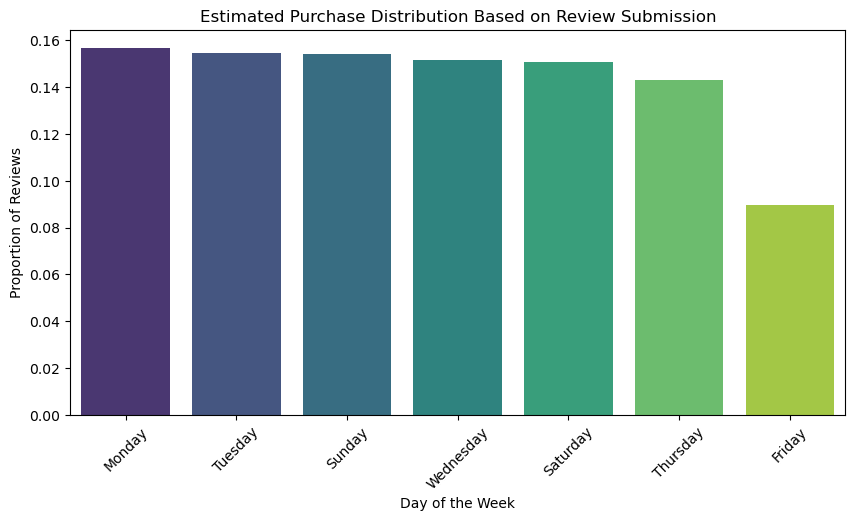

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=reviews_per_day.index, y=reviews_per_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Reviews")
plt.title("Estimated Purchase Distribution Based on Review Submission")
plt.xticks(rotation=45)
plt.show()

In [31]:
df_products_light["sales_count_week"] = df_products_light["sales_count_week"].fillna(0)
daily_sales_estimate = {}

for day, weight in reviews_per_day.items():
    daily_sales_estimate[day] = df_products_light["sales_count_week"] * weight

df_daily_sales = pd.DataFrame(daily_sales_estimate)
df_daily_sales["name"] = df_products_light["name"]
df_daily_sales["price"] = df_products_light["price"]

In [32]:
df_daily_sales

,Monday,Tuesday,Sunday,Wednesday,Saturday,Thursday,Friday,name,price
0,2.191259,2.162187,2.155660,2.121303,2.107797,2.004529,1.257266,پسته فندقی خندان امسالی یک کیلویی تضمین کیفیت ...,5170000.0
1,2.034740,2.007745,2.001684,1.969782,1.957240,1.861348,1.167462,روغن زیتون فدک 1 لیتری مزرعه ارگانیک فدک سید ا...,6600000.0
2,1.878222,1.853303,1.847709,1.818260,1.806683,1.718167,1.077657,عناب درجه یک بیرجند یک کیلویی. تضمین کیفیت و ...,1360000.0
3,1.721703,1.698861,1.693733,1.666738,1.656126,1.574987,0.987852,هل سبز اکبر بنفش50گرمی. سبز ودرشت وبسیار معطر,1054000.0
4,1.721703,1.698861,1.693733,1.666738,1.656126,1.574987,0.987852,زرشک دانه اناری اعلا 1402(یک کیلویی).محصول تضم...,1830000.0
...,...,...,...,...,...,...,...,...,...
2411353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,گارد سیلیکونی MI NOTE9 PRO,950000.0
2411354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,استند لوگو گیم سوپر ماریو Super Mario جنس چوب ...,1350000.0
2411355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,گارد.کاورشیائومی POCO-F3مدل اکلیلی رنگ صورتی ط...,1190000.0
2411356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,بند miband3 miband4و5و6و7,550000.0


In [33]:
total_sales_per_day = df_daily_sales.drop(columns=["name","price"]).sum()
print(total_sales_per_day)

Monday       16518.959003
Tuesday      16299.797617
Sunday       16250.597488
Wednesday    15991.597060
Saturday     15889.775806
Thursday     15111.281722
Friday        9477.991304
dtype: float64


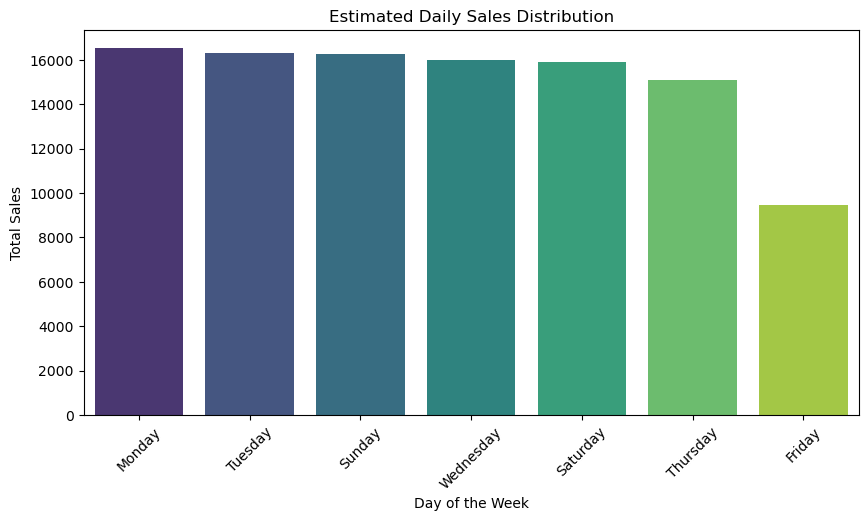

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x=total_sales_per_day.index, y=total_sales_per_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Estimated Daily Sales Distribution")
plt.xticks(rotation=45)
plt.show()

In [35]:
df_daily_sales

,Monday,Tuesday,Sunday,Wednesday,Saturday,Thursday,Friday,name,price
0,2.191259,2.162187,2.155660,2.121303,2.107797,2.004529,1.257266,پسته فندقی خندان امسالی یک کیلویی تضمین کیفیت ...,5170000.0
1,2.034740,2.007745,2.001684,1.969782,1.957240,1.861348,1.167462,روغن زیتون فدک 1 لیتری مزرعه ارگانیک فدک سید ا...,6600000.0
2,1.878222,1.853303,1.847709,1.818260,1.806683,1.718167,1.077657,عناب درجه یک بیرجند یک کیلویی. تضمین کیفیت و ...,1360000.0
3,1.721703,1.698861,1.693733,1.666738,1.656126,1.574987,0.987852,هل سبز اکبر بنفش50گرمی. سبز ودرشت وبسیار معطر,1054000.0
4,1.721703,1.698861,1.693733,1.666738,1.656126,1.574987,0.987852,زرشک دانه اناری اعلا 1402(یک کیلویی).محصول تضم...,1830000.0
...,...,...,...,...,...,...,...,...,...
2411353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,گارد سیلیکونی MI NOTE9 PRO,950000.0
2411354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,استند لوگو گیم سوپر ماریو Super Mario جنس چوب ...,1350000.0
2411355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,گارد.کاورشیائومی POCO-F3مدل اکلیلی رنگ صورتی ط...,1190000.0
2411356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,بند miband3 miband4و5و6و7,550000.0


In [36]:
df_revenue_per_product = df_daily_sales.copy()

In [37]:
weekdays = ["Monday", "Tuesday", "Sunday", "Wednesday", "Saturday", "Thursday", "Friday"]
for day in weekdays:
    df_revenue_per_product[day] = df_revenue_per_product[day] * df_revenue_per_product["price"]

daily_total_revenue = df_revenue_per_product[weekdays].sum()

print(daily_total_revenue)

Monday       5.419762e+10
Tuesday      5.347857e+10
Sunday       5.331714e+10
Wednesday    5.246738e+10
Saturday     5.213331e+10
Thursday     4.957912e+10
Friday       3.109667e+10
dtype: float64


In [38]:
daily_total_revenue_billion = daily_total_revenue / 1e9

print(daily_total_revenue_billion.round(2).astype(str) + " B")

Monday        54.2 B
Tuesday      53.48 B
Sunday       53.32 B
Wednesday    52.47 B
Saturday     52.13 B
Thursday     49.58 B
Friday        31.1 B
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


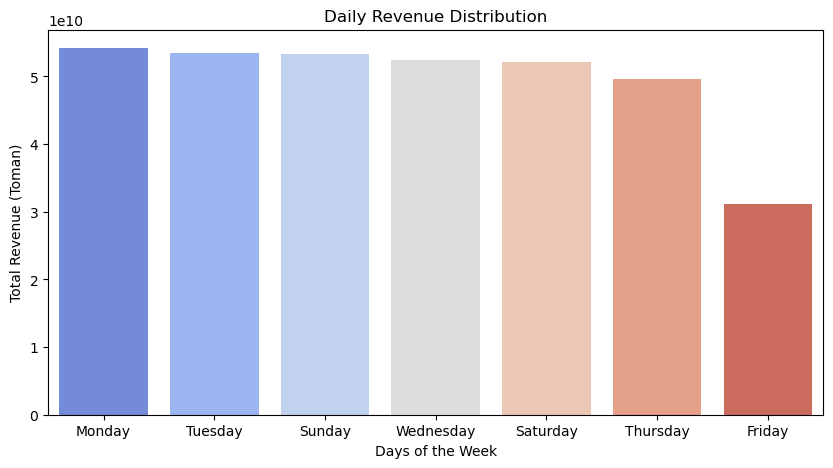

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weekdays, y=daily_total_revenue.values, palette="coolwarm")

plt.xlabel("Days of the Week")
plt.ylabel("Total Revenue (Toman)")
plt.title("Daily Revenue Distribution")
plt.show()

In [40]:
daily_total_revenue

Monday       5.419762e+10
Tuesday      5.347857e+10
Sunday       5.331714e+10
Wednesday    5.246738e+10
Saturday     5.213331e+10
Thursday     4.957912e+10
Friday       3.109667e+10
dtype: float64

In [41]:
total_price_sum = df_daily_sales['price'].sum()

total_revenue_sum = daily_total_revenue.sum()

print(f"Products : {total_price_sum:,.2f}")
print(f"Answer : {total_revenue_sum:,.2f}")

if round(total_price_sum, 2) == round(total_revenue_sum, 2):
    print("Correct answer")
else:
    print("False")

Products : 22,337,060,839,089.00
Answer : 346,269,809,374.00
False


In [45]:
total_price_sum = (df_products['sales_count_week'] * df_products['price']).sum()
print(total_price_sum)

346269809374.0


# What is the amount of sales in different categories?

In [42]:
sales_per_category_weekly = df_products_light.groupby('categoryTitle')['sales_count_week'].sum().reset_index()
sales_per_category_weekly = sales_per_category_weekly.sort_values(by='sales_count_week', ascending=False)
sales_per_category_weekly.sort_index
sales_per_category_weekly

,categoryTitle,sales_count_week
728,کتاب چاپی,2683
745,کفش و دمپایی زنانه,2165
101,بذر و تخم گیاهان,2022
750,کفش، دمپایی مردانه,1928
314,سایر,1838
...,...,...
158,ترجمه,0
155,تذهیب,0
525,مادربورد,0
547,مجلات خارجی,0


In [43]:
df_products_light['weekly_revenue'] = df_products_light['sales_count_week'] * df_products_light['price']

revenue_per_category_weekly = df_products_light.groupby('categoryTitle')['weekly_revenue'].sum().reset_index()
revenue_per_category_weekly = revenue_per_category_weekly.sort_values(by='weekly_revenue', ascending=False)
revenue_per_category_weekly

,categoryTitle,weekly_revenue
516,لوازم پخت و پز,1.046588e+10
750,کفش، دمپایی مردانه,9.193759e+09
745,کفش و دمپایی زنانه,7.664686e+09
336,سرخ کن و کباب پز,6.865884e+09
536,مانتو و تونیک,6.455193e+09
...,...,...
525,مادربورد,0.000000e+00
776,کیس کامپیوتر,0.000000e+00
296,زنجیر چرخ,0.000000e+00
290,رک شبکه و لوازم جانبی,0.000000e+00


In [44]:
sales_revenue_per_category = df_products_light.groupby('categoryTitle').agg(
    total_sales=('sales_count_week', 'sum'),
    total_revenue=('weekly_revenue', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False)

sales_revenue_per_category

,categoryTitle,total_sales,total_revenue
728,کتاب چاپی,2683,3.830099e+09
745,کفش و دمپایی زنانه,2165,7.664686e+09
101,بذر و تخم گیاهان,2022,4.908224e+08
750,کفش، دمپایی مردانه,1928,9.193759e+09
314,سایر,1838,5.519817e+09
...,...,...,...
158,ترجمه,0,0.000000e+00
155,تذهیب,0,0.000000e+00
525,مادربورد,0,0.000000e+00
547,مجلات خارجی,0,0.000000e+00
